# 5. Optimization
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html   
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

In [4]:
%pylab inline
import scipy
import scipy.optimize

Populating the interactive namespace from numpy and matplotlib


In [5]:
help(scipy.optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    Optimization
    
    Local Optimization
    ------------------
    
    .. autosummary::
       :toctree: generated/
    
       minimize - Unified interface for minimizers of multivariate functions
       minimize_scalar - Unified interface for minimizers of univariate functions
       OptimizeResult - The optimization result returned by some optimizers
       OptimizeWarning - The optimization encountered problems
    
    The `minimize` function supports the following methods:
    
    .. toctree::
    
       optimize.minimize-neldermead
       optimize.minimize-powell
       optimize.minimize-cg
       optimize.minimize-bfgs
       optimize.minimize-newtoncg
       optimize.minimize-lbfgsb
       optimize.minimize-tnc
       optimize.minimize-cobyla
       optimize.minimize-slsqp
       optimiz

The module contains:

1. Unconstrained and constrained minimization of multivariate scalar functions (minimize) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)
2. Global (brute-force) optimization routines (e.g. basinhopping, differential_evolution)
3. Least-squares minimization (least_squares) and curve fitting (curve_fit) algorithms
4. Scalar univariate functions minimizers (minimize_scalar) and root finders (newton)
5. Multivariate equation system solvers (root) using a variety of algorithms (e.g. hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov).  

Below, several examples demonstrate their basic usage.

## Unconstrained minimization of multivariate scalar functions (minimize)
The minimize function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize. To demonstrate the minimization function consider the problem of minimizing the Rosenbrock function of NN variables:
> $f\left(\mathbf{x}\right)=\sum_{i=1}^{N-1}100\left(x_{i}-x_{i-1}^{2}\right)^{2}+\left(1-x_{i-1}\right)^{2}.$

The minimum value of this function is 0 which is achieved when xi=1.

Note that the Rosenbrock function and its derivatives are included in scipy.optimize. The implementations shown in the following sections provide examples of how to define an objective function as well as its jacobian and hessian functions.

In [8]:
N = 100
s = np.arange(0, N)
x_i = s[1:]
x_i_1 = s[:-1]
rosen = np.sum(100.0 * (x_i - x_i_1 ** 2.0) **2.0 + (1.0 - x_i_1)**2.0)
rosen

180690366846.0

### Nelder-Mead Simplex algorithm (method='Nelder-Mead')

In the example below, the ***minimize*** routine is used with the ***Nelder-Mead*** simplex algorithm (selected through the method parameter):

In [9]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[ 1.  1.  1.  1.  1.]


The ***simplex*** algorithm is probably the simplest way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems. However, because it does not use any gradient evaluations, it may take longer to find the minimum.

Another optimization algorithm that needs only function calls to find the minimum is ***Powell‘s*** method available by setting ***method='powell'*** in minimize.

In [11]:
res = minimize(rosen, x0, method='powell', options={'xtol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1622
[ 1.  1.  1.  1.  1.]


### Broyden-Fletcher-Goldfarb-Shanno algorithm (method='BFGS')

In order to converge more quickly to the solution, this routine uses the gradient of the objective function. If the gradient is not given by the user, then it is estimated using first-differences. The **Broyden-Fletcher-Goldfarb-Shanno (BFGS)** method typically requires fewer function calls than the simplex algorithm even when the gradient must be estimated.

To demonstrate this algorithm, the Rosenbrock function is again used. The ***gradient of the Rosenbrock function*** is the vector:
> $\begin{eqnarray*} \frac{\partial f}{\partial x_{j}} & = & \sum_{i=1}^{N}200\left(x_{i}-x_{i-1}^{2}\right)\left(\delta_{i,j}-2x_{i-1}\delta_{i-1,j}\right)-2\left(1-x_{i-1}\right)\delta_{i-1,j}.\\  & = & 200\left(x_{j}-x_{j-1}^{2}\right)-400x_{j}\left(x_{j+1}-x_{j}^{2}\right)-2\left(1-x_{j}\right).\end{eqnarray*}$

This expression is valid for the interior derivatives. Special cases are
> $\begin{eqnarray*} \frac{\partial f}{\partial x_{0}} & = & -400x_{0}\left(x_{1}-x_{0}^{2}\right)-2\left(1-x_{0}\right),\\ \frac{\partial f}{\partial x_{N-1}} & = & 200\left(x_{N-1}-x_{N-2}^{2}\right).\end{eqnarray*}$

A Python function which computes this gradient is constructed by the code-segment:

In [12]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

This gradient information is specified in the minimize function through the ***jac*** parameter as illustrated below.

In [13]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True}) 
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([ 1.00000004,  1.0000001 ,  1.00000021,  1.00000044,  1.00000092])

### Newton-Conjugate-Gradient algorithm (method='Newton-CG')

The method which requires the fewest function calls and is therefore often the fastest method to minimize functions of many variables uses the Newton-Conjugate Gradient algorithm. This method is a modified Newton’s method and uses a conjugate gradient algorithm to (approximately) invert the local Hessian. Newton’s method is based on fitting the function locally to a quadratic form:
> $f\left(\mathbf{x}\right)\approx f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}\right)\cdot\left(\mathbf{x}-\mathbf{x}_{0}\right)+\frac{1}{2}\left(\mathbf{x}-\mathbf{x}_{0}\right)^{T}\mathbf{H}\left(\mathbf{x}_{0}\right)\left(\mathbf{x}-\mathbf{x}_{0}\right).$

where H(x0) is a matrix of second-derivatives (the ***Hessian***). If the Hessian is positive definite then the local minimum of this function can be found by setting the gradient of the quadratic form to zero, resulting in
> $\mathbf{x}_{\textrm{opt}}=\mathbf{x}_{0}-\mathbf{H}^{-1}\nabla f.$

The inverse of the Hessian is evaluated using the conjugate-gradient method. An example of employing this method to minimizing the Rosenbrock function is given below. To take full advantage of the Newton-CG method, a function which computes the Hessian must be provided. The Hessian matrix itself does not need to be constructed, only a vector which is the product of the Hessian with an arbitrary vector needs to be available to the minimization routine. As a result, the user can provide either a function to compute the Hessian matrix, or a function to compute the product of the Hessian with an arbitrary vector.

Full Hessian example:
The Hessian of the Rosenbrock function is
> $\begin{eqnarray*} H_{ij}=\frac{\partial^{2}f}{\partial x_{i}\partial x_{j}} & = & 200\left(\delta_{i,j}-2x_{i-1}\delta_{i-1,j}\right)-400x_{i}\left(\delta_{i+1,j}-2x_{i}\delta_{i,j}\right)-400\delta_{i,j}\left(x_{i+1}-x_{i}^{2}\right)+2\delta_{i,j},\\  & = & \left(202+1200x_{i}^{2}-400x_{i+1}\right)\delta_{i,j}-400x_{i}\delta_{i+1,j}-400x_{i-1}\delta_{i-1,j},\end{eqnarray*}$

if $i,j\in\left[1,N-2\right]$ with $i,j\in\left[0, N-1\right]$ defining N x N matrix.  
Other non-zero entries of the matrix are:
< $\begin{eqnarray*} \frac{\partial^{2}f}{\partial x_{0}^{2}} & = & 1200x_{0}^{2}-400x_{1}+2,\\ \frac{\partial^{2}f}{\partial x_{0}\partial x_{1}}=\frac{\partial^{2}f}{\partial x_{1}\partial x_{0}} & = & -400x_{0},\\ \frac{\partial^{2}f}{\partial x_{N-1}\partial x_{N-2}}=\frac{\partial^{2}f}{\partial x_{N-2}\partial x_{N-1}} & = & -400x_{N-2},\\ \frac{\partial^{2}f}{\partial x_{N-1}^{2}} & = & 200.\end{eqnarray*}$


For example, the Hessian when N=5N=5 is
> $\mathbf{H}=\left[\begin{array}{ccccc} 1200x_{0}^{2}-400x_{1}+2 & -400x_{0} & 0 & 0 & 0\\ -400x_{0} & 202+1200x_{1}^{2}-400x_{2} & -400x_{1} & 0 & 0\\ 0 & -400x_{1} & 202+1200x_{2}^{2}-400x_{3} & -400x_{2} & 0\\ 0 &  & -400x_{2} & 202+1200x_{3}^{2}-400x_{4} & -400x_{3}\\ 0 & 0 & 0 & -400x_{3} & 200\end{array}\right].$


The code which computes this Hessian along with the code to minimize the function using Newton-CG method is shown in the following example:

In [14]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24


array([ 1.        ,  1.        ,  1.        ,  0.99999999,  0.99999999])

#### Hessian product example:
For larger minimization problems, storing the entire Hessian matrix can consume considerable time and memory. The Newton-CG algorithm only needs the product of the Hessian times an arbitrary vector. As a result, the user can supply code to compute this product rather than the full Hessian by giving a hess function which take the minimization vector as the first argument and the arbitrary vector as the second argument (along with extra arguments passed to the function to be minimized). If possible, using Newton-CG with the Hessian product option is probably the fastest way to minimize the function.

In this case, the product of the Rosenbrock Hessian with an arbitrary vector is not difficult to compute. If pp is the arbitrary vector, then H(x)pH(x)p has elements:
> $\mathbf{H}\left(\mathbf{x}\right)\mathbf{p}=\left[\begin{array}{c} \left(1200x_{0}^{2}-400x_{1}+2\right)p_{0}-400x_{0}p_{1}\\ \vdots\\ -400x_{i-1}p_{i-1}+\left(202+1200x_{i}^{2}-400x_{i+1}\right)p_{i}-400x_{i}p_{i+1}\\ \vdots\\ -400x_{N-2}p_{N-2}+200p_{N-1}\end{array}\right].$

Code which makes use of this Hessian product to minimize the Rosenbrock function using minimize follows:

In [16]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 66


array([ 1.        ,  1.        ,  1.        ,  0.99999999,  0.99999999])

### Constrained minimization of multivariate scalar functions (minimize)
The minimize function also provides an interface to several constrained minimization algorithm. As an example, the Sequential Least SQuares Programming optimization algorithm (SLSQP) will be considered here. This algorithm allows to deal with constrained minimization problems of the form:

minF(x)subject to
> $\begin{eqnarray*} \min F(x) \\ \text{subject to } & C_j(X) =  0  ,  &j = 1,...,\text{MEQ}\\
         & C_j(x) \geq 0  ,  &j = \text{MEQ}+1,...,M\\
        &  XL  \leq x \leq XU , &I = 1,...,N. \end{eqnarray*}$
        
As an example, let us consider the problem of maximizing the function:
> $f(x, y) = 2 x y + 2 x - x^2 - 2 y^2$

subject to an equality and an inequality constraints defined as:
> $\begin{eqnarray*}
  x^3 - y &= 0 \\
  y - 1 &\geq 0
\end{eqnarray*}$

The objective function and its derivative are defined as follows.

In [17]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

Note that since minimize only minimizes functions, the sign parameter is introduced to multiply the objective function (and its derivative) by -1 in order to perform a maximization.

Then constraints are defined as a sequence of dictionaries, with keys type, fun and jac.

In [18]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

Now an unconstrained optimization can be performed as:

In [19]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[ 2.  1.]


and a constrained optimization as:

In [20]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               constraints=cons, method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.00000018311
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[ 1.00000009  1.        ]


### Least-squares minimization (least_squares)
SciPy is capable of solving robustified bound constrained nonlinear least-squares problems:
> $\begin{split}\begin{align}
&\min_\mathbf{x} \frac{1}{2} \sum_{i = 1}^m \rho\left(f_i(\mathbf{x})^2\right) \\
&\text{subject to }\mathbf{lb} \leq \mathbf{x} \leq \mathbf{ub}
\end{align}\end{split}$

Here fi(x)fi(x) are smooth functions from ℝnRn to ℝR, we refer to them as residuals. The purpose of a scalar valued function ρ(⋅) is to reduce the influence of outlier residuals and contribute to robustness of the solution, we refer to it as a ***loss function***. A linear loss function gives a standard least-squares problem. Additionally, constraints in a form of lower and upper bounds on some of $x_j$ are allowed.

All methods specific to least-squares minimization utilize a m×n matrix of partial derivatives called ***Jacobian*** and defined as $J_{ij} = \partial f_i / \partial x_j$. It is highly recommended to compute this matrix analytically and pass it to least_squares, otherwise it will be estimated by finite differences which takes a lot of additional time and can be very inaccurate in hard cases.

Function ***least_squares*** can be used for fitting a function $\varphi(t; \mathbf{x})$ to empirical data $\{(t_i, y_i), i = 0, \ldots, m-1\}$. To do this one should simply precompute residuals as $f_i(\mathbf{x}) = w_i (\varphi(t_i; \mathbf{x}) - y_i)$, where $w_i$ are weights assigned to each observation.

### Example of solving a fitting problem

Here we consider “Analysis of an Enzyme Reaction” problem formulated in [1]. There are 11 residuals defined as
> $f_i(x) = \frac{x_0 (u_i^2 + u_i x_1)}{u_i^2 + u_i x_2 + x_3} - y_i, \quad i = 0, \ldots, 10,$

where $y_i$ are measurement values and $u_i$ are values of the independent variable. The unknown vector of parameters is$\mathbf{x} = (x_0, x_1, x_2, x_3)^T$. As was said previously, it is recommended to compute Jacobian matrix in a closed form:
> $\begin{split}\begin{align}
&J_{i0} = \frac{\partial f_i}{\partial x_0} = \frac{u_i^2 + u_i x_1}{u_i^2 + u_i x_2 + x_3} \\
&J_{i1} = \frac{\partial f_i}{\partial x_1} = \frac{u_i x_0}{u_i^2 + u_i x_2 + x_3} \\
&J_{i2} = \frac{\partial f_i}{\partial x_2} = -\frac{x_0 (u_i^2 + u_i x_1) u_i}{(u_i^2 + u_i x_2 + x_3)^2} \\
&J_{i3} = \frac{\partial f_i}{\partial x_3} = -\frac{x_0 (u_i^2 + u_i x_1)}{(u_i^2 + u_i x_2 + x_3)^2}
\end{align}\end{split}$

We are going to use the “hard” starting point defined in [1]. To find a physically meaningful solution, avoid potential division by zero and assure convergence to the global minimum we impose constraints $0 \leq x_j \leq 100, j = 0, 1, 2, 3.$

The code below implements least-squares estimation of $\mathbf{x}$ and finally plots the original data and the fitted model function:

`ftol` termination condition is satisfied.
Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.


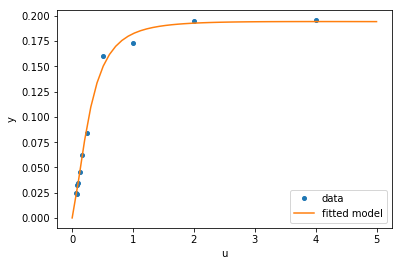

In [30]:
from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = (u ** 2 + x[1] * u)
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
# `ftol` termination condition is satisfied.
# Function evaluations 130, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.92e-08.
res.x
# array([ 0.19280596,  0.19130423,  0.12306063,  0.13607247])

import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='best')
plt.show()

## Univariate function minimizers (minimize_scalar)
Often only the minimum of an univariate function (i.e. a function that takes a scalar as input) is needed. In these circumstances, other optimization techniques have been developed that can work faster. These are accessible from the ***minimize_scalar*** function which proposes several algorithms.

### Unconstrained minimization (method='brent')

There are actually two methods that can be used to minimize an univariate function: ***brent*** and ***golden***, but golden is included only for academic purposes and should rarely be used. These can be respectively selected through the method parameter in minimize_scalar. The brent method uses Brent’s algorithm for locating a minimum. Optimally a bracket (the bracket parameter) should be given which contains the minimum desired. A bracket is a triple (a,b,c)(a,b,c) such that f(a)>f(b)<f(c)f(a)>f(b)<f(c) and a<b<c. If this is not given, then alternatively two starting points can be chosen and a bracket will be found from these points using a simple marching algorithm. If these two starting points are not provided 0 and 1 will be used (this may not be the right choice for your function and result in an unexpected minimum being returned).

Here is an example:

In [42]:
from scipy.optimize import minimize_scalar
f = lambda x: (x - 2) * (x + 1)**2
res = minimize_scalar(f, bracket = (1, 2), method='brent')
print(res.x)

1


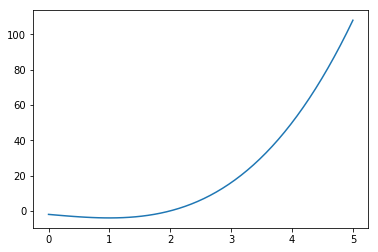

In [32]:
x = np.linspace(0, 5)
plt.plot(x, f(x))

### Bounded minimization (method='bounded')

Very often, there are constraints that can be placed on the solution space before minimization occurs. The bounded method in minimize_scalar is an example of a constrained minimization procedure that provides a rudimentary interval constraint for scalar functions. The interval constraint allows the minimization to occur only between two fixed endpoints, specified using the mandatory bounds parameter.

For example, to find the minimum of J1(x)J1(x) near x=5x=5 , minimize_scalar can be called using the interval [4,7][4,7] as a constraint. The result is xmin=5.3314xmin=5.3314 :

In [44]:
from scipy.special import j1
res = minimize_scalar(j1, bounds=(4, 7), method='bounded')
res.x

5.3314418424098315

## Custom minimizers

Sometimes, it may be useful to use a custom method as a (multivariate or univariate) minimizer, for example when using some library wrappers of minimize (e.g. basinhopping).

We can achieve that by, instead of passing a method name, we pass a callable (either a function or an object implementing a __call__ method) as the method parameter.

Let us consider an (admittedly rather virtual) need to use a trivial custom multivariate minimization method that will just search the neighborhood in each dimension independently with a fixed step size:

In [47]:
from scipy.optimize import OptimizeResult

def custmin(fun, x0, args=(), maxfev=None, stepsize=0.1,
            maxiter=100, callback=None, **options):
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False
    
    while improved and not stop and niter < maxiter:
        improved = False
        niter += 1
        for dim in range(np.size(x0)):
            for s in [bestx[dim] - stepsize, bestx[dim] + stepsize]:
                testx = np.copy(bestx)
                testx[dim] = s
                testy = fun(testx, *args)
                funcalls += 1
                if testy < besty:
                    besty = testy
                    bestx = testx
                    improved = True
                    if callback is not None:
                        callback(bestx)
                        if maxfev is not None and funcalls >= maxfev:
                            stop = True
                            break
    return OptimizeResult(fun=besty, x=bestx, nit=niter,
                          nfev=funcalls, success=(niter > 1))

x0 = [1.35, 0.9, 0.8, 1.1, 1.2]
res = minimize(rosen, x0, method=custmin, options=dict(stepsize=0.05))
res.x

array([ 1.,  1.,  1.,  1.,  1.])

This will work just as well in case of univariate optimization:

In [50]:
 def custmin(fun, bracket, args=(), maxfev=None, stepsize=0.1,
             maxiter=100, callback=None, **options):
        bestx = (bracket[1] + bracket[0]) / 2.0
        besty = fun(bestx)
        funcalls = 1
        niter = 0
        improved = True
        stop = False
        
        while improved and not stop and niter < maxiter:
            improved = False
            niter += 1
            for testx in [bestx - stepsize, bestx + stepsize]:
                testy = fun(testx, *args)
                funcalls += 1
                if testy < besty:
                    besty = testy
                    bestx = testx
                    improved = True
                    if callback is not None:
                        callback(bestx)
                        if maxfev is not None and funcalls >= maxfev:
                            stop = True
                            break
        return OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))
    
def f(x):
    return (x - 2)**2 * (x + 2)**2
    
res = minimize_scalar(f, bracket=(-3.5, 0), method=custmin,
                      options=dict(stepsize = 0.05))
res.x

-2.0

## Root finding

### Scalar functions
If one has a single-variable equation, there are four different root finding algorithms that can be tried. Each of these algorithms requires the endpoints of an interval in which a root is expected (because the function changes signs). In general ***brentq*** is the best choice, but the other methods may be useful in certain circumstances or for academic purposes.

### Fixed-point solving

A problem closely related to finding the zeros of a function is the problem of finding a fixed-point of a function. A fixed point of a function is the point at which evaluation of the function returns the point: g(x)=x.g(x)=x. Clearly the fixed point of gg is the root of f(x)=g(x)−x.f(x)=g(x)−x. Equivalently, the root of ff is the fixed_point of g(x)=f(x)+x.g(x)=f(x)+x. The routine fixed_point provides a simple iterative method using Aitkens sequence acceleration to estimate the fixed point of gg given a starting point.

### Sets of equations

Finding a root of a set of non-linear equations can be achieve using the ***root*** function. Several methods are available, amongst which ***hybr*** (the default) and ***lm*** which respectively use the ***hybrid method of Powell*** and the ***Levenberg-Marquardt*** method from ***MINPACK***.

The following example considers the single-variable transcendental equation
> $x + 2 cos(x) = 0$

a root of which can be found as follows:

In [53]:
import numpy as np
from scipy.optimize import root
def func(x):
    return x + 2 * np.cos(x)

sol = root(func, 0.3)
sol.x

array([-1.02986653])

In [84]:
sol.fun

array([ -6.66133815e-16])

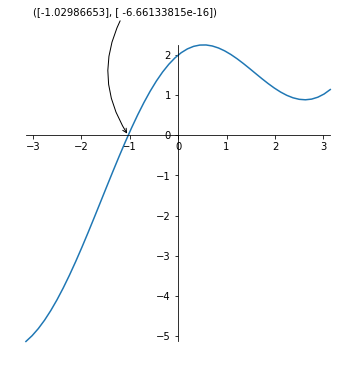

In [87]:
x = np.linspace(-np.pi, np.pi)

ax = plt.gca()

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, func(x))

plt.annotate(s = '({}, {})'.format(sol.x, func(sol.x)),
             xy = [sol.x, func(sol.x)],
             xytext = [-3, 3],             
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.3"))

fig = plt.gcf()
fig.set_figheight(6)
fig.set_figwidth(6)

Consider now a set of non-linear equations
>$\begin{eqnarray*}
 x_{0}\cos\left(x_{1}\right) & = & 4,\\
 x_{0}x_{1}-x_{1} & = & 5.
 \end{eqnarray*}$

We define the objective function so that it also returns the Jacobian and indicate this by setting the jac parameter to True. Also, the ***Levenberg-Marquardt*** solver is used here.

In [91]:
def func2(x):
    f = [x[0] * np.cos(x[1]) - 4,
         x[1]*x[0] - x[1] - 5]
    df = np.array([[np.cos(x[1]), -x[0] * np.sin(x[1])],
                   [x[1], x[0] - 1]])
    return f, df
sol = root(func2, [1, 1], jac=True, method='lm')
sol.x

array([ 6.50409711,  0.90841421])

### Root finding for large problems

Methods hybr and lm in root cannot deal with a very large number of variables (N), as they need to calculate and invert a dense N x N Jacobian matrix on every Newton step. This becomes rather inefficient when N grows.

Consider for instance the following problem: we need to solve the following integrodifferential equation on the square [0,1]×[0,1]:
> $(\partial_x^2 + \partial_y^2) P + 5 \left(\int_0^1\int_0^1\cosh(P)\,dx\,dy\right)^2 = 0$

with the boundary condition P(x,1)=1 on the upper edge and P=0 elsewhere on the boundary of the square. This can be done by approximating the continuous function P by its values on a grid, Pn,m≈P(nh,mh), with a small grid spacing h. The derivatives and integrals can then be approximated; for instance $\partial_x^2 P(x,y)\approx{}(P(x+h,y) - 2 P(x,y) +
P(x-h,y))/h^2$. The problem is then equivalent to finding the root of some function residual(P), where P is a vector of length NxNy.

Now, because NxNyNxNy can be large, methods hybr or lm in root will take a long time to solve this problem. The solution can however be found using one of the large-scale solvers, for example ***krylov, broyden2, or anderson***. These use what is known as the ***inexact Newton method***, which instead of computing the Jacobian matrix exactly, forms an approximation for it.

The problem we have can now be solved as follows:

0:  |F(x)| = 803.614; step 1; tol 0.000257947
1:  |F(x)| = 345.905; step 1; tol 0.166748
2:  |F(x)| = 139.157; step 1; tol 0.14566
3:  |F(x)| = 27.3742; step 1; tol 0.0348269
4:  |F(x)| = 1.03336; step 1; tol 0.00128252
5:  |F(x)| = 0.0403316; step 1; tol 0.00137097
6:  |F(x)| = 0.00345649; step 1; tol 0.00661032
7:  |F(x)| = 0.000151167; step 1; tol 0.00172142
8:  |F(x)| = 6.62016e-06; step 1; tol 0.0017261
Residual: 3.61519e-07


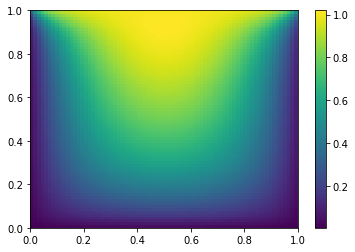

In [93]:
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
   d2x = zeros_like(P)
   d2y = zeros_like(P)

   d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
   d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
   d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

   d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
   d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
   d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

   return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()

### Still too slow? Preconditioning.

When looking for the zero of the functions fi(x)=0fi(x)=0, i = 1, 2, ..., N, the krylov solver spends most of its time inverting the Jacobian matrix,
> $J_{ij} = \frac{\partial f_i}{\partial x_j} .$

If you have an approximation for the inverse matrix $M\approx J^{-1}$, you can use it for ***preconditioning*** the linear inversion problem. The idea is that instead of solving Js=y one solves MJs=My: since matrix MJ is “closer” to the identity matrix than J is, the equation should be easier for the Krylov method to deal with.

The matrix M can be passed to root with method krylov as an option options['jac_options']['inner_M']. It can be a (sparse) matrix or a scipy.sparse.linalg.LinearOperator instance.

For the problem in the previous section, we note that the function to solve consists of two parts: the first one is application of the Laplace operator, [∂2x+∂2y]P[∂x2+∂y2]P, and the second is the integral. We can actually easily compute the Jacobian corresponding to the Laplace operator part: we know that in one dimension
> $\begin{split}\partial_x^2 \approx \frac{1}{h_x^2} \begin{pmatrix}
-2 & 1 & 0 & 0 \cdots \\
1 & -2 & 1 & 0 \cdots \\
0 & 1 & -2 & 1 \cdots \\
\ldots
\end{pmatrix}
= h_x^{-2} L\end{split}$

so that the whole 2-D operator is represented by
> $J_1 = \partial_x^2 + \partial_y^2
\simeq
h_x^{-2} L \otimes I + h_y^{-2} I \otimes L$

The matrix J2J2 of the Jacobian corresponding to the integral is more difficult to calculate, and since all of it entries are nonzero, it will be difficult to invert. J1J1 on the other hand is a relatively simple matrix, and can be inverted by scipy.sparse.linalg.splu (or the inverse can be approximated by scipy.sparse.linalg.spilu). So we are content to take M≈J−11M≈J1−1 and hope for the best.

In the example below, we use the preconditioner $M=J_1^{-1}$

0:  |F(x)| = 172.73; step 1; tol 1.19171e-05


/home/wei/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:309: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


1:  |F(x)| = 4.88242; step 1; tol 0.000719081
2:  |F(x)| = 0.165932; step 1; tol 0.00103952
3:  |F(x)| = 0.000125172; step 1; tol 5.12155e-07
4:  |F(x)| = 4.43282e-09; step 1; tol 1.12872e-09
Residual 1.01354569182e-09
Evaluations 140


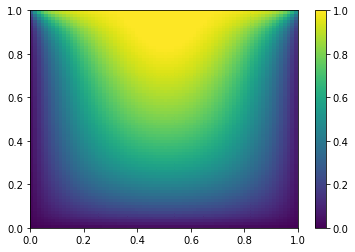

In [97]:
import numpy as np
from scipy.optimize import root
from scipy.sparse import spdiags, kron
from scipy.sparse.linalg import spilu, LinearOperator
from numpy import cosh, zeros_like, mgrid, zeros, eye

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def get_preconditioner():
    """Compute the preconditioner M"""
    diags_x = zeros((3, nx))
    diags_x[0,:] = 1/hx/hx
    diags_x[1,:] = -2/hx/hx
    diags_x[2,:] = 1/hx/hx
    Lx = spdiags(diags_x, [-1,0,1], nx, nx)

    diags_y = zeros((3, ny))
    diags_y[0,:] = 1/hy/hy
    diags_y[1,:] = -2/hy/hy
    diags_y[2,:] = 1/hy/hy
    Ly = spdiags(diags_y, [-1,0,1], ny, ny)

    J1 = kron(Lx, eye(ny)) + kron(eye(nx), Ly)

    # Now we have the matrix `J_1`. We need to find its inverse `M` --
    # however, since an approximate inverse is enough, we can use
    # the *incomplete LU* decomposition

    J1_ilu = spilu(J1)

    # This returns an object with a method .solve() that evaluates
    # the corresponding matrix-vector product. We need to wrap it into
    # a LinearOperator before it can be passed to the Krylov methods:

    M = LinearOperator(shape=(nx*ny, nx*ny), matvec=J1_ilu.solve)
    return M

def solve(preconditioning=True):
    """Compute the solution"""
    count = [0]

    def residual(P):
        count[0] += 1

        d2x = zeros_like(P)
        d2y = zeros_like(P)

        d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2])/hx/hx
        d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
        d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

        d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
        d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
        d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

        return d2x + d2y + 5*cosh(P).mean()**2

    # preconditioner
    if preconditioning:
        M = get_preconditioner()
    else:
        M = None

    # solve
    guess = zeros((nx, ny), float)

    sol = root(residual, guess, method='krylov',
               options={'disp': True,
                        'jac_options': {'inner_M': M}})
    print('Residual', abs(residual(sol.x)).max())
    print('Evaluations', count[0])

    return sol.x

def main():
    sol = solve(preconditioning=True)

    # visualize
    import matplotlib.pyplot as plt
    x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
    plt.clf()
    plt.pcolor(x, y, sol)
    plt.clim(0, 1)
    plt.colorbar()
    plt.show()

main()

Using a preconditioner reduced the number of evaluations of the residual function by a factor of 4. For problems where the residual is expensive to compute, good preconditioning can be crucial — it can even decide whether the problem is solvable in practice or not.

Preconditioning is an art, science, and industry. Here, we were lucky in making a simple choice that worked reasonably well, but there is a lot more depth to this topic than is shown here.